# Game of Thrones

In [1]:
%matplotlib nbagg 
#inline, nbagg
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_battles = pd.read_csv('data/game-of-thrones/battles.csv', sep=',')
df_deaths = pd.read_csv('data/game-of-thrones/character-deaths.csv', sep=',')

** 참고: https://www.kaggle.com/mylesoneill/game-of-thrones

- 작품 번호에 따른 인물들의 죽음 횟수 시각화하기 - 라인 플롯

In [3]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
Name                  917 non-null object
Allegiances           917 non-null object
Death Year            305 non-null float64
Book of Death         307 non-null float64
Death Chapter         299 non-null float64
Book Intro Chapter    905 non-null float64
Gender                917 non-null int64
Nobility              917 non-null int64
GoT                   917 non-null int64
CoK                   917 non-null int64
SoS                   917 non-null int64
FfC                   917 non-null int64
DwD                   917 non-null int64
dtypes: float64(4), int64(7), object(2)
memory usage: 93.2+ KB


In [4]:
arr_book_nums_to_death_count = df_deaths['Book of Death'].value_counts().sort_index()

In [5]:
arr_book_nums_to_death_count

1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Book of Death, dtype: int64

<IPython.core.display.Javascript object>


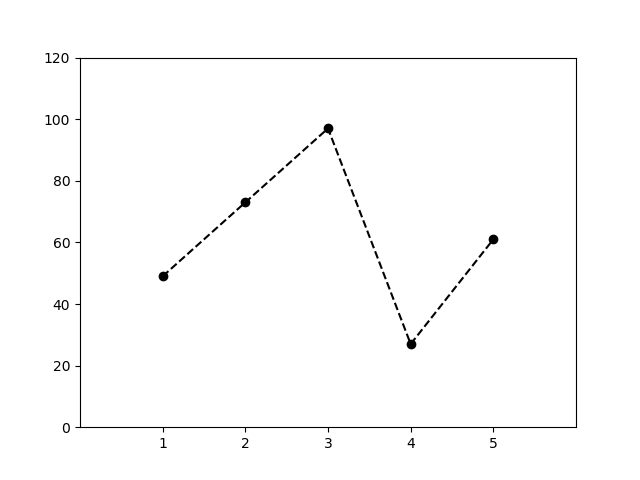

In [7]:
gp_line = arr_book_nums_to_death_count.plot(color="k", marker="o", linestyle="--")

In [8]:
gp_line.set_xticks(np.arange(1, 6))
gp_line.set_xlim([0, 6])
gp_line.set_ylim([0, 120])

(0, 120)

- 대규모 전투 상에서 공격군과 수비군 간의 병력 차이 시각화하기 - 박스 플롯

In [9]:
df_battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [10]:
df_battles = df_battles.set_index(["name"])

In [11]:
df_battles.head()

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [12]:
mask_large_battles = df_battles["attacker_size"] + df_battles["defender_size"] > 10000

In [15]:
mask_large_battles.shape

(38,)

In [14]:
df_large_battles = df_battles.loc[mask_large_battles, ["attacker_size", "defender_size"]]
df_large_battles.head()

,attacker_size,defender_size
name,,
Battle of the Golden Tooth,15000.0,4000.0
Battle of Riverrun,15000.0,10000.0
Battle of the Green Fork,18000.0,20000.0
Battle of the Camps,6000.0,12625.0
Battle of Oxcross,6000.0,10000.0


<IPython.core.display.Javascript object>


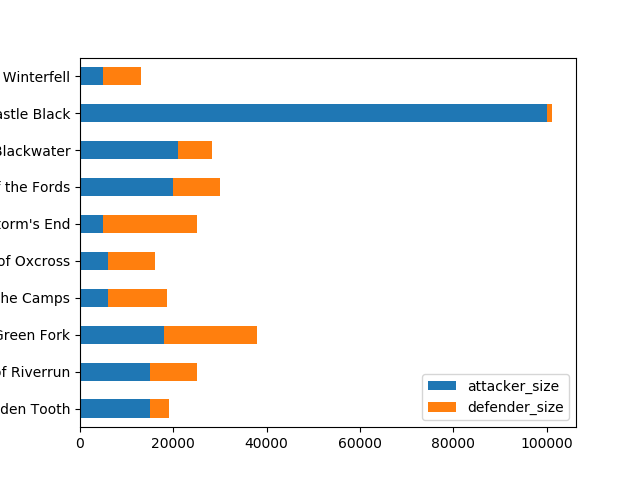

In [16]:
gp_barh_battle = df_large_battles.plot(kind="barh", stacked=True, fontsize=10)

In [17]:
df_large_battles["attacker_pcts"] = \
    df_large_battles["attacker_size"] / (df_large_battles["attacker_size"] + df_large_battles["defender_size"])
df_large_battles["defender_pcts"] = \
    df_large_battles["defender_size"] / (df_large_battles["attacker_size"] + df_large_battles["defender_size"])

In [18]:
df_large_battles.head()

,attacker_size,defender_size,attacker_pcts,defender_pcts
name,,,,
Battle of the Golden Tooth,15000.0,4000.0,0.789474,0.210526
Battle of Riverrun,15000.0,10000.0,0.600000,0.400000
Battle of the Green Fork,18000.0,20000.0,0.473684,0.526316
Battle of the Camps,6000.0,12625.0,0.322148,0.677852
Battle of Oxcross,6000.0,10000.0,0.375000,0.625000


<IPython.core.display.Javascript object>


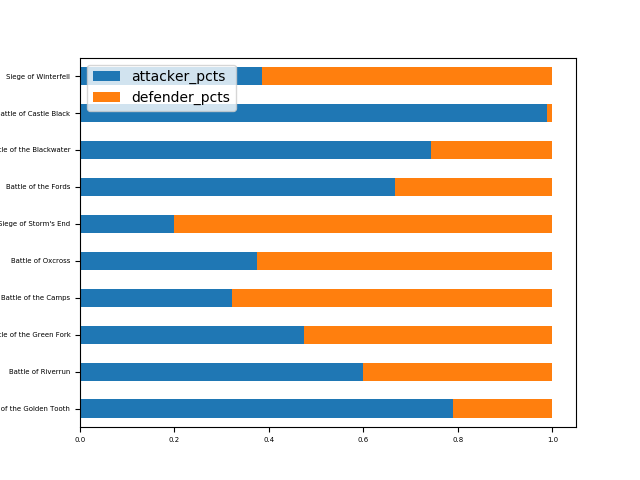

In [19]:
gp_barh_battle_pcts = df_large_battles[["attacker_pcts", "defender_pcts"]].plot(kind="barh", stacked=True, fontsize=5)

- 전체 전투 중 각 가문의 개입 빈도 시각화하기 - 히스토그램

In [20]:
col_names = df_battles.columns[4:12]
col_names

Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [21]:
# NaN makes an error
arr_house_names = df_battles[col_names].fillna("None").values

In [22]:
arr_house_names[:5]

array([['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Baratheon', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Stark', 'None', 'None', 'None', 'Lannister', 'None', 'None',
        'None'],
       ['Stark', 'Tully', 'None', 'None', 'Lannister', 'None', 'None',
        'None']], dtype=object)

In [23]:
arr_house_names = np.unique(arr_house_names)
arr_house_names

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister',
       'Mallister', 'Mormont', "Night's Watch", 'None', 'Stark', 'Thenns',
       'Tully', 'Tyrell'], dtype=object)

In [24]:
arr_house_names = arr_house_names[arr_house_names != "None"]
arr_house_names

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister',
       'Mallister', 'Mormont', "Night's Watch", 'Stark', 'Thenns',
       'Tully', 'Tyrell'], dtype=object)

In [25]:
seri_houses_to_battle_counts = pd.Series(0, index=arr_house_names)
seri_houses_to_battle_counts

Baratheon                      0
Blackwood                      0
Bolton                         0
Bracken                        0
Brave Companions               0
Brotherhood without Banners    0
Darry                          0
Free folk                      0
Frey                           0
Giants                         0
Glover                         0
Greyjoy                        0
Karstark                       0
Lannister                      0
Mallister                      0
Mormont                        0
Night's Watch                  0
Stark                          0
Thenns                         0
Tully                          0
Tyrell                         0
dtype: int64

In [26]:
for col in col_names:
    seri_houses_to_battle_counts = \
        seri_houses_to_battle_counts.add(df_battles[col].value_counts(), fill_value=0)

In [27]:
seri_houses_to_battle_counts

Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

<IPython.core.display.Javascript object>


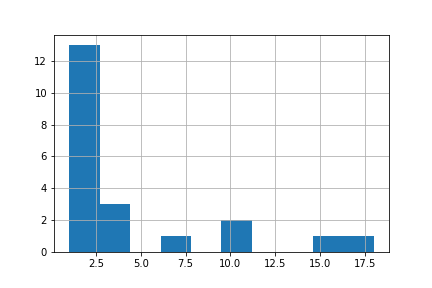

In [83]:
gp_houses_to_battle = seri_houses_to_battle_counts.hist(bins=10)